In [1]:
%load_ext autoreload
%autoreload 2
import bert
import samples
import sklearn.mixture
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as  plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from utils import *
import pdb
import umap
import hdbscan


from numpy import dot
from numpy.linalg import norm
from sklearn.metrics import silhouette_score


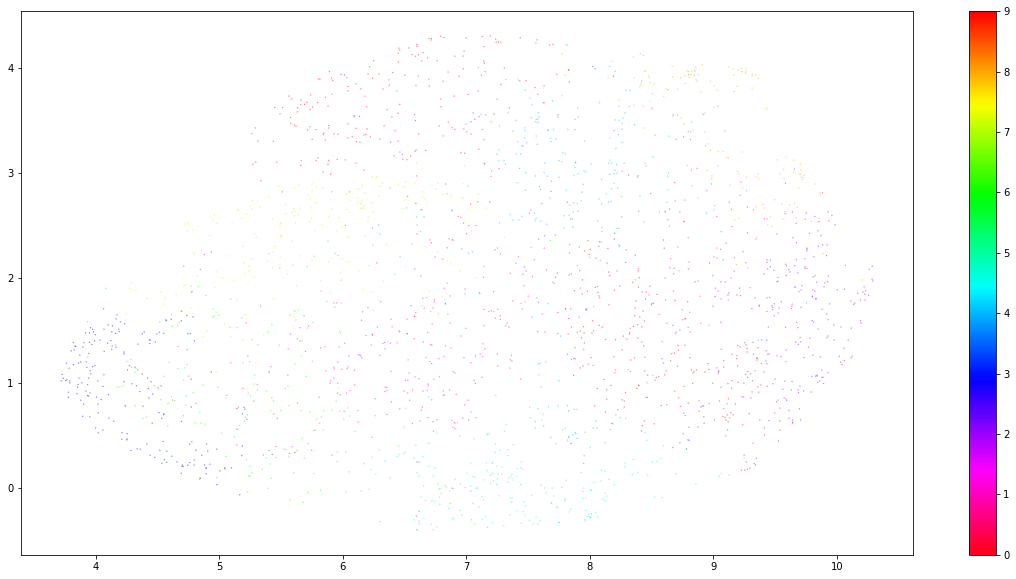

In [11]:
nips_df = pd.read_csv("nips_2022_clean.csv")
embeddings = load_embeddings("outputs/clean_nips_2022_embeddings.pkl")
embeddings = np.array(embeddings)
# reduce dimensions to 5 using umap
reduced_embeddings = reduce_dim(embeddings, "umap", 5)
# reduced_embeddings = embeddings
# cluster
cluster_algorithm = "gmm" # dbscan/gmm

clusters, model = cluster_and_predict(reduced_embeddings, cluster_algorithm, num_cluster=10)

if cluster_algorithm == "gmm":
    paper_labels = clusters
elif cluster_algorithm == "dbscan":
    paper_labels = clusters.labels_

# for dbscan
# visualize(embeddings, clusters.labels_)

# for gmm
visualize(embeddings, paper_labels)



In [12]:
dic = {}
# for dbscan
# dic = metrics(["sil"], reduced_embeddings, clusters.labels_, dic)

# for gmm
dic = metrics(["sil"], reduced_embeddings, paper_labels, dic)

print(dic)

{'sil': 0.15739861}


In [13]:
nips_df, docs_per_topic = create_docs_per_topic(nips_df, paper_labels)

tf_idf, count = c_tf_idf(docs_per_topic.abstract.values, m=len(nips_df))

top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20)
topic_sizes = extract_topic_sizes(nips_df); topic_sizes.head(10)

c:\Users\echen\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Topic,Size
1,1,396
4,4,265
2,2,245
7,7,208
9,9,208
5,5,196
3,3,190
0,0,185
6,6,181
8,8,146


In [14]:
print(topic_sizes)

   Topic  Size
1      1   396
4      4   265
2      2   245
7      7   208
9      9   208
5      5   196
3      3   190
0      0   185
6      6   181
8      8   146


In [26]:
top_n_words[9][:50]

[('agents', 0.009384598008048743),
 ('agent', 0.00897255413822677),
 ('human', 0.006938816155964843),
 ('reinforcement', 0.00673799773755239),
 ('rl', 0.0066219360272972375),
 ('reward', 0.006444903904480762),
 ('language', 0.005917300835869507),
 ('robustness', 0.005598779457576725),
 ('systems', 0.005531077362228387),
 ('task', 0.005314853328545873),
 ('attacks', 0.005234556466568433),
 ('ai', 0.005206504510366271),
 ('meta', 0.005011463661858409),
 ('demonstrate', 0.004962092933876689),
 ('multi', 0.00490500187511811),
 ('tasks', 0.004880306197438523),
 ('adversarial', 0.004711897773679569),
 ('different', 0.004657171508031665),
 ('information', 0.004640379027050511),
 ('generalization', 0.004637878357467426)]

In [8]:
top_n_words[5][:10]

[('3d', 0.02896285069661077),
 ('scene', 0.018290884614085103),
 ('camera', 0.015491176163946485),
 ('images', 0.015206925348009537),
 ('reconstruction', 0.014732394333896996),
 ('poses', 0.014654538438119721),
 ('pose', 0.014516650812357281),
 ('scenes', 0.013544405490856537),
 ('image', 0.013420081816518829),
 ('deformation', 0.012702113958092084)]